<a href="https://colab.research.google.com/github/SSDivyaRavali/CDS/blob/main/Module2/Fare_Amount_Prediction_Using_Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Implementation of Linear Regression on a Large Dataset Using Dask Library

## Learning Objectives

At the end of the mini-project, you will be able to :

- understand how dask handles large dataset over pandas dataframe 
- perform exploratory data analysis on a large dataset (2 Million rows) using dask
- implement linear regression model using dask library and make predictions


## Problem Statement

 Predict the taxi fare amount in New York city using Dask-ML.

## Information

### Dask 
[Dask](https://dask.pydata.org/en/latest/) is an open source project that gives abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.

We can summarize the basics of Dask as follows:

* processes data that doesn’t fit into memory by breaking it into blocks and specifying task chains

* parallelizes execution of tasks across cores and even nodes of a cluster

* moves computation to the data rather than the other way around, to minimize communication overhead

Dask provides multi-core execution on larger-than-memory datasets.Dask provides efficient parallelization for data analytics in python. DaskDataframes allows you to work with large datasets for both data manipulation and
building ML models with only minimal code changes.

High level collections: Dask provides high-level Array, Bag, and DataFrame
collections that mimic NumPy, lists, and Pandas but can operate in parallel on
datasets that don't fit into main memory. Dask's high-level collections are
alternatives to NumPy and Pandas for large datasets.

○ Low Level schedulers: Dask provides dynamic task schedulers that execute
task graphs in parallel. These schedulers are low-latency (around 1ms) and
work hard to run computations in a small memory footprint.

**Limitations of Dask**
Dask.distributed has limitations. Understanding these can help you to reliably
create efficient distributed computations.
● The central scheduler spends a few hundred microseconds on every task.
For optimal performance, task durations should be greater than 10-100ms.
● Dask can not parallelize within individual tasks. Individual tasks should be a
comfortable size so as not to overwhelm any particular worker.
● Dask assigns tasks to workers heuristically. It usually makes the right
decision, but non-optimal situations do occur.
● The workers are just Python processes, and inherit all capabilities and
limitations of Python. They do not bound or limit themselves in any way. In
production you may wish to run dask-workers within containers.

Parallel processing refers to executing multiple tasks at the same time, using multiple processors in the same machine.

Generally, the code is executed in sequence, one task at a time. However, if you have a complex code that takes a long time to run but has no logic dependency on each other then instead of waiting for the previous task to complete, we compute multiple steps simultaneously. This lets you take advantage of the available processing power, which is the case in most modern computers, thereby reducing the total time taken

### Dataset

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. Its variables are as follows:
![Dataset](https://cdn.iisc.talentsprint.com/CDS/Images/NYC_Taxi_data_description.png)




## Grading = 10 Points

In [ ]:
#@title Install Dask dependencies and restart runtime
!pip -qq install dask-ml==1.8.0
!pip -qq install dask==2.9.1
!pip -qq install dask[delayed]
!pip -qq install dask[dataframe] --upgrade

#### Importing Necessary Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import dask
import dask.dataframe as dd     # library to import Dask DataFrame
import dask.array as da         # for handling large arrays 
from dask import delayed         # import the delayed function of dask
from dask_ml.linear_model import LinearRegression    
from dask_ml.model_selection import train_test_split
from dask_ml.metrics import mean_squared_error, r2_score
from dask.distributed import Client
import time as time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dask.distributed import Client, progress  # task distribution
client = Client()

from time import sleep 

Python time sleep function is used to add delay in the execution of a program. We can use python sleep function to halt the execution of the program for given time in seconds. Notice that python time sleep function actually stops the execution of current thread only, not the whole program

 can use delayed() function to wrap the function calls that you want to turn into tasks.
**What does dask.delayed do?**

The Dask delayed function decorates your functions so that they operate lazily. Rather than executing your function immediately, it will defer execution, placing the function and its arguments into a task graph. It wraps a function or object to produce a Delayed.

In [ ]:
!pip show dask #version of dask

Name: dask
Version: 2.9.1
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: distributed, dask-ml, dask-glm


In [ ]:
#@title Download the data
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv

--2021-09-12 10:52:14--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231900522 (221M) [application/octet-stream]
Saving to: ‘Dask_MP_dataset.csv.2’

Dask_MP_dataset.csv 100%[===================>] 221.16M  15.6MB/s    in 20s     

2021-09-12 10:52:35 (11.1 MB/s) - ‘Dask_MP_dataset.csv.2’ saved [231900522/231900522]



#### Exercise 1: Read the dataset using dask library and compare the time of execution with pandas library.

**Hint:** pass `dtype` for passenger_count as `int64`

A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along with the index. One Dask DataFrame operation triggers many operations on the constituent Pandas DataFrames.

Dask DataFrames coordinate many Pandas DataFrames/Series arranged along the index..A Dask DataFrame is partitioned row-wise, grouping rows by index value for efficiency. These Pandas objects may live on disk or on other machines.Because the dask.dataframe application programming interface (API) is a subset of the Pandas API, it should be familiar to Pandas users. There are some slight alterations due to the parallel nature of Dask.
As with all Dask collections, one triggers computation by calling the .compute() method



In [ ]:
FILE_NAME = "Dask_MP_dataset.csv"

In [ ]:
%%time
df = dd.read_csv(FILE_NAME, dtype={'passenger_count': 'int64'})

CPU times: user 14.5 ms, sys: 7.05 ms, total: 21.6 ms
Wall time: 22.4 ms


In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
npartitions=4,,,,,,,,,
,int64,object,float64,object,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [ ]:
df.map_partitions(len).compute()

0    555083
1    553091
2    549331
3    342495
dtype: int64

Dask dataframes object has no data, unlike the pandas data frame. Dask has just read the start of the first file and the column names and dtypes. That's why dask is considered to be lazy in operation.

For seeing the data in the dask dataframe we need to execute .head() function

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#df.compute().shape[0]

In [ ]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
#df.nunique()


In [ ]:
df.index

Dask Index Structure:
npartitions=4
    int64
      ...
      ...
      ...
      ...
dtype: int64
Dask Name: from-delayed, 16 tasks

In [ ]:
df.set_index('Unnamed: 0')
df = df.map_partitions(lambda df: df.sort_values(['Unnamed: 0','pickup_datetime']))

In [ ]:
#df.map_partitions(len).compute()

In [ ]:
df.get_partition(2).head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1108174,2015-03-18 02:11:40.0000003,6.5,2015-03-18 02:11:40 UTC,-73.973320,40.763309,-73.991936,40.752888,1
1,1108175,2015-04-13 20:37:48.0000004,7.5,2015-04-13 20:37:48 UTC,-73.975647,40.751766,-73.997414,40.741596,1
2,1108176,2009-08-24 19:10:00.0000002,50.5,2009-08-24 19:10:00 UTC,-73.976605,40.747535,-73.982237,40.756028,1
3,1108177,2013-01-23 18:04:58.0000004,9.5,2013-01-23 18:04:58 UTC,-73.978751,40.758530,-74.002382,40.738946,1
4,1108178,2010-03-14 04:58:53.0000001,5.3,2010-03-14 04:58:53 UTC,-73.997489,40.725695,-73.998101,40.740483,1



#### Use pandas to read the dataset and compare the time taken

In [ ]:
%%time
# pd.options.display.precision = 2
#pd.options.display.max_rows = 30
#data_pd=pd.read_csv(FILE_NAME)
#data_pd.head(5)
date_cols = ["pickup_datetime","key"]
df_pd=pd.read_csv(FILE_NAME,parse_dates=date_cols)

CPU times: user 5min 15s, sys: 4.83 s, total: 5min 20s
Wall time: 5min 25s


Using dask dataframe it is much more time efficient to execute as it takes ms compared to pandas 

Notably, Dask DataFrame has the following limitations:

Setting a new index from an unsorted column is expensive

Many operations like groupby-apply and join on unsorted columns require setting the index, which as mentioned above, is expensive

The Pandas API is very large. Dask DataFrame does not attempt to implement many Pandas features or any of the more exotic data structures like NDFrames

Operations that were slow on Pandas, like iterating through row-by-row, remain slow on Dask DataFrame

### Data Analysis (2 Points)



#### Exercise 2: Drop the unnecessary columns. Also drop the duplicate rows and the rows having null values.

**Hint:** Drop those columns which are not useful in EDA as well as model implementation

Parquet is a column-store, which means that it can efficiently pull out only a few columns from your dataset. This is good because it helps to avoid unnecessary data loading.

df = dd.read_parquet('data', columns=['name', 'x'],)

In [ ]:
#df.compute().info()

In [ ]:
""" Drop unnecessary columns """
# Drop specified labels from rows or columns
df=df.drop(columns = ['key','Unnamed: 0'])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#Sort the dataset by a single column.
df = df.map_partitions(lambda df: df.sort_values(['pickup_datetime']))
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
297860,11.8,2009-01-01 00:31:32 UTC,-73.955075,40.768991,-73.973230,40.747979,1
124750,16.5,2009-01-01 00:35:03 UTC,-73.991938,40.738414,-74.003499,40.683326,1
82469,6.2,2009-01-01 00:41:00 UTC,-73.994202,40.751008,-73.985817,40.750577,2
124445,5.4,2009-01-01 00:47:26 UTC,-73.987324,40.749571,-73.976034,40.741951,1
76195,4.9,2009-01-01 01:21:54 UTC,-73.951810,40.714897,-73.962162,40.709354,4


In [ ]:
""" Drop duplicate rows """
# YOUR CODE HERE
df = df.map_partitions(lambda df: df.drop_duplicates())
#df.compute().shape

In [ ]:
""" drop NA rows """
#Drop rows with Null value
df = df.map_partitions(lambda df: df.dropna())
#df.compute().shape


In [ ]:
#Null values of each columns
#df.isna().sum(axis=0).compute()

In [ ]:
#df.compute().shape

In [ ]:
#df.fare_amount.max().compute()

In [ ]:
column_names = ["fare_amount","pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude"]#without passenger count
df = df[(df[column_names] != 0).all(axis=1)] # remove the latitude and longitude rows with zeros
df = df.loc[(df.fare_amount > 0) & (df.fare_amount < 200) & 
            ~(((df.pickup_longitude - df.dropoff_longitude) == 0.0000) & 
             ((df.pickup_latitude - df.dropoff_latitude) == 0.0000))]     # remove the rows where fare amounts less than or greater than zero or with same coordinates                 

In [ ]:
# removing trips with zero passengers
df = df[df['passenger_count'] > 0]
#df.compute().shape

In [ ]:
df.describe().compute()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.932515e+06,1.932515e+06,1.932515e+06,1.932515e+06,1.932515e+06,1.932515e+06
mean,1.133719e+01,-7.391335e+01,4.069542e+01,-7.391162e+01,4.069293e+01,1.690816e+00
std,9.566133e+00,7.648626e+00,5.088968e+00,7.368360e+00,8.325461e+00,1.305579e+00
min,1.000000e-02,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,1.000000e+00
25%,6.000000e+00,-7.399227e+01,4.073654e+01,-7.399157e+01,4.073557e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075338e+01,-7.398061e+01,4.075388e+01,1.000000e+00
75%,1.250000e+01,-7.396842e+01,4.076760e+01,-7.396539e+01,4.076841e+01,2.000000e+00
max,1.995000e+02,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,9.000000e+00


#### Exercise 3: Visualize the target variable, i.e., `fare_amount` to study the fare distribution, using a histogram density plot. Analyze the fare_amount distribution, try to visualize it for a range of [0, 60].

**Hint:** [sns.hisplot()](https://stackoverflow.com/questions/51027636/seaborn-histogram-with-bigdata/51027895) and use `.between` to plot the graph for given range 


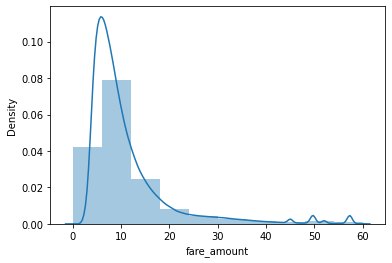

In [ ]:
""" explore and plot the density plot of fare_amount """
# YOUR CODE HERE
filtered_df= df[(df["fare_amount"] >= 0) & (df["fare_amount"] <= 60)]
sns.distplot(filtered_df['fare_amount'], bins=10, kde=True)
plt.show()

**Inference from plot**
The distribution is skewed with fare amount less than 20 

Note: When we create an object, it is just a blueprint until you call compute(). That is when the job gets distributed to all the workers, and the actual function gets called, or concrete values are generated

#### Observe the number of workers and cores running in your machine

Initialize a client and observe how many workers are working and the number of cores utilizing for the given data set.

Making a cluster
The dask.distributed system is composed of a single centralized scheduler and one or more worker processes. Deploying a remote Dask cluster involves some additional effort. But doing things locally is just involves creating a Client object, which lets you interact with the "cluster" (local threads or processes on your machine)

In [ ]:
client

Client Scheduler: tcp://127.0.0.1:41525 Dashboard: http://127.0.0.1:46745/status,Cluster Workers: 2 Cores: 2 Memory: 13.62 GB


In [ ]:
""" Initialize a client """
# Use all cores
#client = Client(processes = True)

df_new = client.persist(df)

print(client.nthreads())
print(client.dashboard_link)

{'tcp://127.0.0.1:35567': 1, 'tcp://127.0.0.1:46725': 1}
http://127.0.0.1:46745/status


### EDA based on Time (2 Points)

#### Exercise 4: Extract day of the week (dow), hour, month and year from `pickup_datetime`.

**Hint:** use `pd.to_datetime()` function as dask does not have this functionality in it.

Remember to use `.compute()` while passing the dask dataframe in defined function.

In [ ]:
# YOUR CODE HERE
df = dd.concat([df,dd.to_datetime(df['pickup_datetime']).apply(
        lambda x: pd.Series([x.year, x.month, x.day, x.weekday(), x.hour],
        index=['pickup_year', 'pickup_month', 'pickup_dd' ,'pickup_weekday', 'pickup_hour']))], axis=1)   # extract year, month, weekday and hour from pickup datetime

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_dd,pickup_weekday,pickup_hour
npartitions=4,,,,,,,,,,,,
,float64,object,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


#### Exercise 5: a.) Plot the taxi trip by hour of the day

* Partition the data into segments using `dask.from_pandas()`

* Plot the taxi trip for hour of the day. **Hint:** [sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [ ]:
""" taxi trip repartition by hour of the day """
from dask.dataframe import from_pandas
#import pandas as pd
#date_cols = ["pickup_datetime","key"]
#df_pd=pd.read_csv(FILE_NAME,parse_dates=date_cols)

#dask_new = from_pandas(df_pd, npartitions=4)
#dask_new.divisions
#df_pd['pickup_datetime'] = df_pd['pickup_datetime'].astype('datetime64[ns]')
df_pd['year'] = df_pd.pickup_datetime.dt.year
df_pd['month'] = df_pd.pickup_datetime.dt.month
df_pd['hour'] = df_pd.pickup_datetime.dt.hour
df_pd['weekday'] = df_pd.pickup_datetime.dt.weekday


In [ ]:
dask_new = from_pandas(df_pd, npartitions=4)
dask_new.divisions

(0, 500000, 1000000, 1500000, 1999999)

In [ ]:
dask_new.set_index('Unnamed: 0')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,weekday
npartitions=4,,,,,,,,,,,,
0,datetime64[ns],float64,"datetime64[ns, UTC]",float64,float64,float64,float64,int64,int64,int64,int64,int64
500000,...,...,...,...,...,...,...,...,...,...,...,...
1000000,...,...,...,...,...,...,...,...,...,...,...,...
1500000,...,...,...,...,...,...,...,...,...,...,...,...
1999999,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
#Data cleaning of this new dataframe
# Drop specified labels from rows or columns
dask_new=dask_new.drop(columns = ['key','Unnamed: 0'])
#Sort the dataset by a single column.
dask_new = dask_new.map_partitions(lambda df: df.sort_values(['pickup_datetime']))
""" Drop duplicate rows """
dask_new = dask_new.map_partitions(lambda df: df.drop_duplicates())
""" drop NA rows """
#Drop rows with Null value
dask_new = dask_new.map_partitions(lambda df: df.dropna())
column_names = ["fare_amount","pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude"]#without passenger count
dask_new = dask_new[(dask_new[column_names] != 0).all(axis=1)] # remove the latitude and longitude rows with zeros
dask_new = dask_new.loc[(dask_new.fare_amount > 0) & (dask_new.fare_amount < 200) & 
            ~(((dask_new.pickup_longitude - dask_new.dropoff_longitude) == 0) & 
             ((dask_new.pickup_latitude - dask_new.dropoff_latitude) == 0))]     # remove the rows where fare amounts less than or greater than zero or with same coordinates

In [ ]:
# removing trips with zero passengers
dask_new = dask_new[dask_new['passenger_count'] > 0]
#dask_new.compute().shape

In [ ]:
dask_new.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,weekday
297860,11.8,2009-01-01 00:31:32+00:00,-73.955075,40.768991,-73.973230,40.747979,1,2009,1,0,3
124750,16.5,2009-01-01 00:35:03+00:00,-73.991938,40.738414,-74.003499,40.683326,1,2009,1,0,3
82469,6.2,2009-01-01 00:41:00+00:00,-73.994202,40.751008,-73.985817,40.750577,2,2009,1,0,3
124445,5.4,2009-01-01 00:47:26+00:00,-73.987324,40.749571,-73.976034,40.741951,1,2009,1,0,3
76195,4.9,2009-01-01 01:21:54+00:00,-73.951810,40.714897,-73.962162,40.709354,4,2009,1,1,3


In [ ]:
dask_new.npartitions

4

In [ ]:
#dask_new['pickup_datetime'] = dask_new['pickup_datetime'].astype('datetime64[ns]')
#dask_new['year'] = dask_new.pickup_datetime.dt.year
#dask_new['month'] = dask_new.pickup_datetime.dt.month
#dask_new['hour'] = dask_new.pickup_datetime.dt.hour
#dask_new['weekday'] = dask_new.pickup_datetime.dt.weekday

In [ ]:
dask_new.get_partition(1).head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,weekday
880228,15.0,2009-01-01 00:00:46+00:00,-73.953738,40.806762,-73.989427,40.769542,1,2009,1,0,3
661006,5.8,2009-01-01 00:01:04+00:00,-73.995133,40.734111,-73.998232,40.722874,2,2009,1,0,3
756707,29.4,2009-01-01 00:11:42+00:00,-73.959992,40.773613,-73.821503,40.861338,2,2009,1,0,3
745620,7.4,2009-01-01 00:12:02+00:00,-73.959527,40.771260,-73.967503,40.787736,1,2009,1,0,3
964259,7.4,2009-01-01 00:20:31+00:00,-73.988451,40.746666,-73.989793,40.726512,1,2009,1,0,3


In [ ]:
#Plot the taxi trip for hour of the day.
week_group=dask_new.groupby(["year","month","weekday"])["hour","fare_amount"].count()
#week_group=dask_new.groupby(["weekday","hour"]).sum().unstack()
week_group.reset_index(drop=True)
week_group.head()

hour  fare_amount
year month weekday                   
2009 1     0        2641         2641
           1        3232         3232
           2        3180         3180
           3        4009         4009
           4        4507         4507

<Figure size 576x720 with 0 Axes>

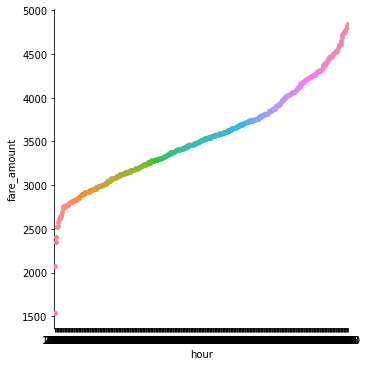

In [ ]:
#week_grp = dask_new.groupby(dask_new["weekday"])["fare_amount","hour"].count()
plt.figure(figsize=(8,10))
sns.catplot(x="hour",y="fare_amount",data=week_group.compute())
plt.show()

As number of hours per day increases the fare amount increase

In [ ]:
#Plot the taxi trip for hour of the day.
week_grp=dask_new.groupby(["year","month","weekday","hour"])["fare_amount"].count()
#week_group=dask_new.groupby(["weekday","hour"]).sum().unstack()
week_grp.reset_index(drop=True)
week_grp.head()

year  month  weekday  hour
2009  1      0        0       70
                      1       54
                      2       29
                      3       19
                      4       21
Name: fare_amount, dtype: int64

In [ ]:
np.array(week_grp).shape

(13104,)

#### Exercise 5: b.) Plot the taxi trip repartition by day of the week (dow)

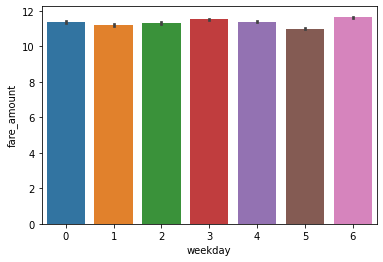

In [ ]:
""" taxi trip repartition by day of the week """
#week_day_1=dask_new.query("weekday==1")
#dask_new = dask_new.repartition(npartitions=dask_new.npartitions )
#week_mean = dask_new.groupby(dask_new['weekday']).mean()
sns.barplot(x="weekday",y="fare_amount",data=dask_new.compute())

plt.show()

#### Exercise 6: a.) Draw a plot between the target variable and passenger count and analyze it. 

In [ ]:
""" passenger count feature """
#num_of_pass = dask_new['passenger_count'].unique()
# mean by number of passengers
#pass_mean = dask_new.groupby(dask_new['passenger_count']).mean()
sns.barplot(x='passenger_count',y="fare_amount",data=dask_new.compute())
plt.show()

#### Exercise 6: b.) Draw a plot between the target variable and hour and analyze it. 

In [ ]:

""" fare amount by hour """
hr_mean = dask_new.groupby(dask_new['hour']).mean()
sns.lineplot(x="hour",y="fare_amount",data=hr_mean)
plt.show()

### Feature Engineering (1 Point)

#### Exercise 7: Compute the Haversine distance between pickup and dropoff point

* Convert the latitude and longitude co-rodinates to radians

* Calculate the Haversine distance

  **Hint:** [haversine_distances](https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4)

* Add the "distance" feature to the dataset and plot its distribution

In [ ]:
""" distance feature """
# calculating trip distance using haversine formula
import math # math formulae
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    dist = np.round(res, 2)
    return dist
# adding distance column to dataframe
dist_array = []
dask_new = dask_new.map_partitions(lambda dask_new: 
                                 dask_new.assign(
                                     distance=haversine_distance(
                                        dask_new.pickup_latitude, 
                                        dask_new.pickup_longitude,
                                        dask_new.dropoff_latitude,
                                        dask_new.dropoff_longitude 
                                     )))
dask_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,weekday,distance
npartitions=4,,,,,,,,,,,,
0,float64,"datetime64[ns, UTC]",float64,float64,float64,float64,int64,int64,int64,int64,int64,float64
500000,...,...,...,...,...,...,...,...,...,...,...,...
1000000,...,...,...,...,...,...,...,...,...,...,...,...
1500000,...,...,...,...,...,...,...,...,...,...,...,...
1999999,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
distance_data = dask_new['distance']
#distance_data.compute().quantile(0.75)

In [ ]:
""" plot the distance feature (take distance < 50) """
# YOUR CODE HERE
filtered_df= dask_new[(dask_new["distance"] < 50)]
sns.distplot(filtered_df['distance'], bins=10, kde=True)
plt.show()

### Correlation between distance and fare amount (1 Point)

In [ ]:
col=["distance","fare_amount"]
corr_df=dask_new[col]
corr_df.corr().compute()

,distance,fare_amount
distance,1.000000,0.035418
fare_amount,0.035418,1.000000


In [ ]:
corr_df.head()

,distance,fare_amount
297860,2.79,11.8
124750,6.20,16.5
82469,0.71,6.2
124445,1.27,5.4
76195,1.07,4.9


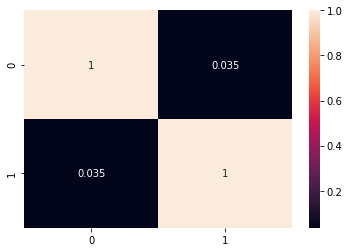

In [ ]:
""" correlation between fare_amount and distance """
# YOUR CODE HERE
""" correlation between fare_amount and distance """
sns.heatmap(corr_df.corr(),annot=True)

### Preparing dataset for model implementation

**Note:** Use the above modified dataset for modelling.

In [ ]:
dask_new.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
month                              int64
hour                               int64
weekday                            int64
distance                         float64
dtype: object

### Removing outliers from training set Based on Coordinates (1 Point)

#### Exercise 8: Remove the outliers using the given latitude and longitude features from the dataset. We need to analyze the data of taxi within New York City.

**Hint:** Given the co-ordinates of New York city are Latitude: 40.7128° and Longitude: -74.0060°. You can include the pickup and drop off points such that there left and right value mean will be the given co-ordinate value. 

Also, choose nearest extreme values.

Use `.between()` and pass left and right value attributes accordingly.

In [ ]:
#New York coordinates -> lat = 40.7128 with +2, lon = -74.0060 with +/-2
log_mean=-74.0060
upper_log_mean=-74.0060+2
lower_log_mean=-74.0060-1
lat_mean=-40.7128
upper_lat_mean=40.7128+2
lower_lat_mean=40.7128-2
print(upper_lat_mean)
dask_new = dask_new[dask_new['pickup_longitude'] <= upper_log_mean]
dask_new = dask_new[dask_new['pickup_longitude'] >= lower_log_mean]

dask_new = dask_new[dask_new['pickup_latitude'] <= upper_lat_mean]
dask_new = dask_new[dask_new['pickup_latitude'] >= lower_lat_mean]

dask_new = dask_new[dask_new['dropoff_longitude'] <= upper_log_mean]
dask_new = dask_new[dask_new['dropoff_longitude'] >= lower_log_mean]

dask_new = dask_new[dask_new['dropoff_latitude'] <= upper_lat_mean]
dask_new = dask_new[dask_new['dropoff_latitude'] >= lower_lat_mean]

dask_new.compute().shape

42.7128


(1930654, 12)

### Modelling (3 Points)

#### Exercise 9: Divide the data into train and test splits with X as feature variables and y as target variable

* Divide data into train test split with 70-30 ratio, Hint: `train_test_split()`

* As dask functions operate lazily so, before calling `.fit()` function, call the dask dataframe with `.compute()`.
* Convert X_train and y_train into array using `.values` as [dask's](https://ml.dask.org/modules/api.html) `.fit()` function takes array as attribute

In [ ]:
features=['month', 'year', 'hour', 'pickup_longitude','dropoff_longitude','dropoff_latitude','pickup_latitude',
           'weekday','distance']
target='fare_amount'
Y=dask_new[target]
X=dask_new[features]

In [ ]:
X.dtypes

month                  int64
year                   int64
hour                   int64
pickup_longitude     float64
dropoff_longitude    float64
dropoff_latitude     float64
pickup_latitude      float64
weekday                int64
distance             float64
dtype: object

In [ ]:
""" select the target and feature variables and split the data into train and test """
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
print (X_train, y_train)
print (X_test, y_test)

Dask DataFrame Structure:
               month   year   hour pickup_longitude dropoff_longitude dropoff_latitude pickup_latitude weekday distance
npartitions=4                                                                                                          
0              int64  int64  int64          float64           float64          float64         float64   int64  float64
500000           ...    ...    ...              ...               ...              ...             ...     ...      ...
1000000          ...    ...    ...              ...               ...              ...             ...     ...      ...
1500000          ...    ...    ...              ...               ...              ...             ...     ...      ...
1999999          ...    ...    ...              ...               ...              ...             ...     ...      ...
Dask Name: split, 224 tasks Dask Series Structure:
npartitions=4
0          float64
500000         ...
1000000        ...
1500000     

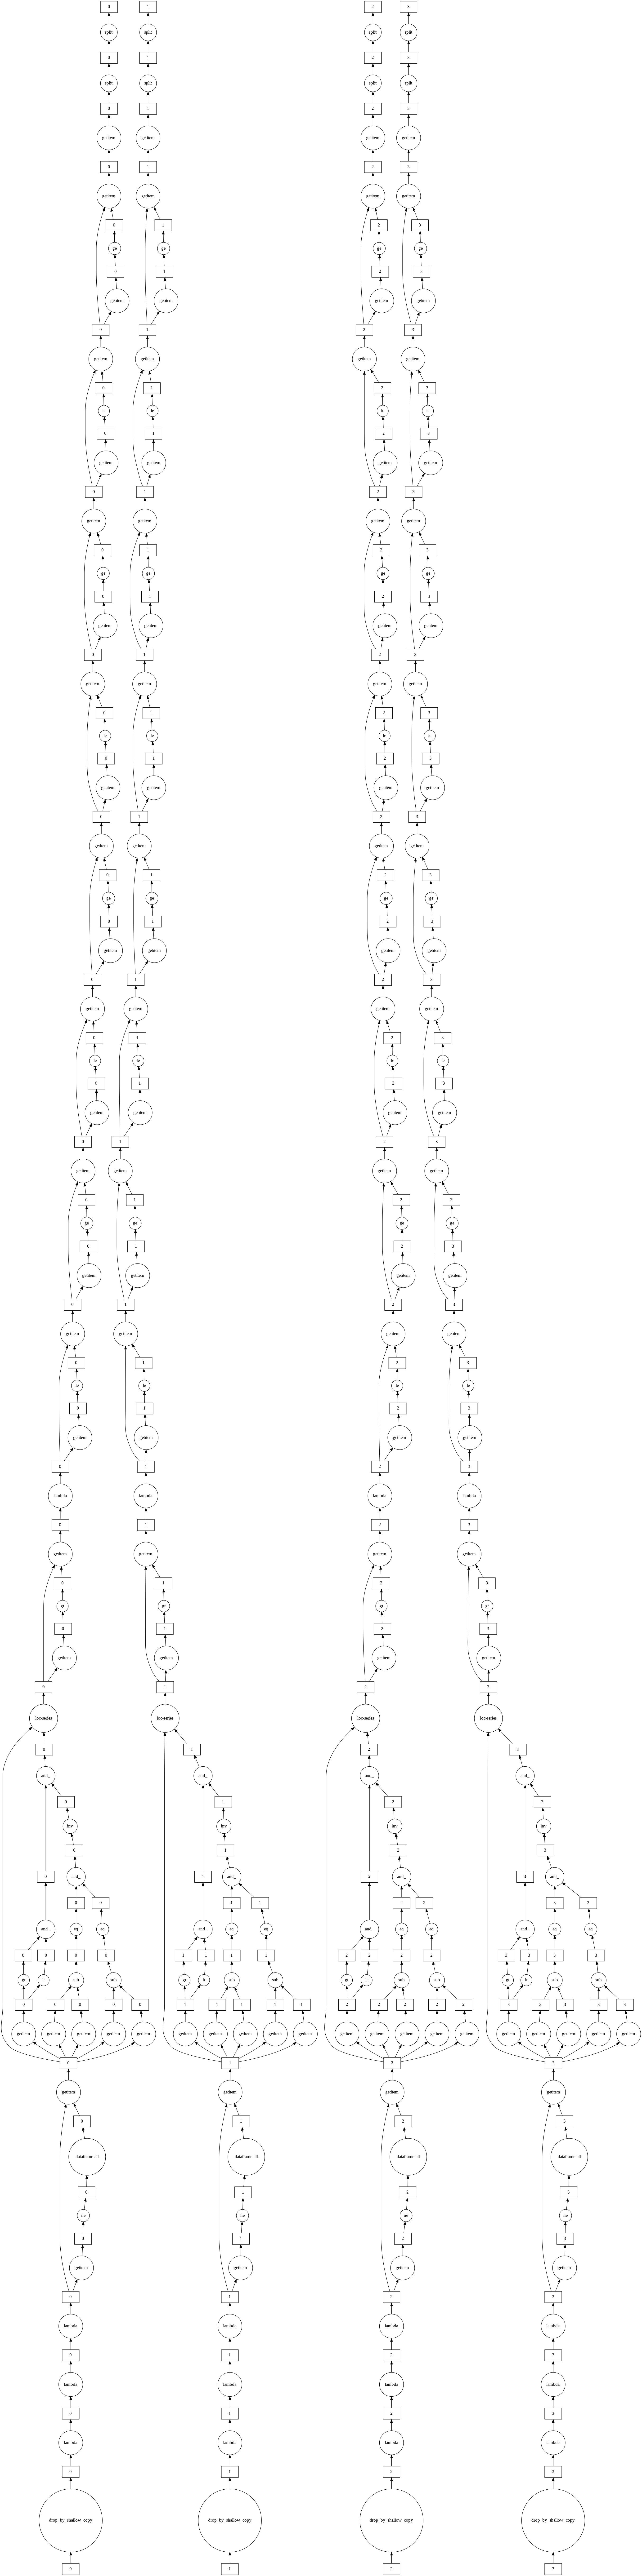

In [ ]:
y_test.visualize()

In [ ]:
# fit a model ont training data.
from dask_ml.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train.compute().values, y_train.compute().values)

#### Exercise 10: Predict the test data and calculate the mean squared error and r2 score.

**Hint:** Remember to call `.compute()` function as dask functions operate lazily and convert the dask dataframe to `.values` (Array type) as suggested in above exercise

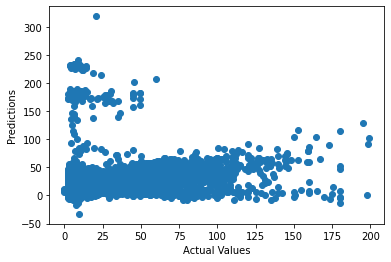

In [ ]:
""" predict the values """
""" predict the values """
predictions = lm.predict(X_test.compute().values)
## The line / model
plt.scatter(x=y_test.compute().values, y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
#plt.scatter(X_test.compute().values, y_test.compute().values, color = "red")
#plt.plot(X_test.compute().values, lr.predict(X_test.compute().values), color = "green")
#plt.show()

In [ ]:
type(y_test)

dask.dataframe.core.Series

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
y_test.compute().shape

(579482,)

In [ ]:
predictions.shape

(579482,)

In [ ]:
#from sklearn.metrics import mean_squared_error,r2_score
#mean_squared_error(y_test.compute().values,predictions)   #without coordinate  features


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test.compute().values,predictions)

32.565363907772955

In [ ]:

#r2_score(y_test.compute().values, predictions) without coordinates

In [ ]:
r2_score(y_test.compute().values, predictions)

0.6451892172264261

### Report Analysis
* Discuss the pros and cons of using dask
* Derive the insights and discuss
* Comment on the performance metrics (MSE, R^2 score)


In [ ]:
""" compute mean squared error and r2_score """
# YOUR CODE HERE
""" compute mean squared error and r2_score """
mean_squared_error(y_test.values,predictions)
r2_score(y_test.values, predictions)

TypeError: ignored